In [1]:
import os

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

C:\Users\zelay\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
## load the data frame

wine_df=pd.read_csv('winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
## dataframe shape
wine_df.shape

(1599, 12)

In [4]:
## dataframe target column value counts

wine_df.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

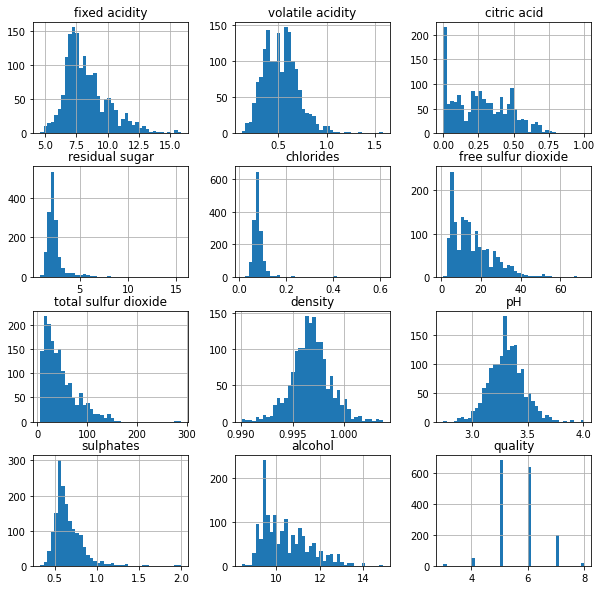

In [5]:
## Visulaization of data column wise heat map

wine_df.hist(bins=40, figsize=(10, 10))
plt.show()

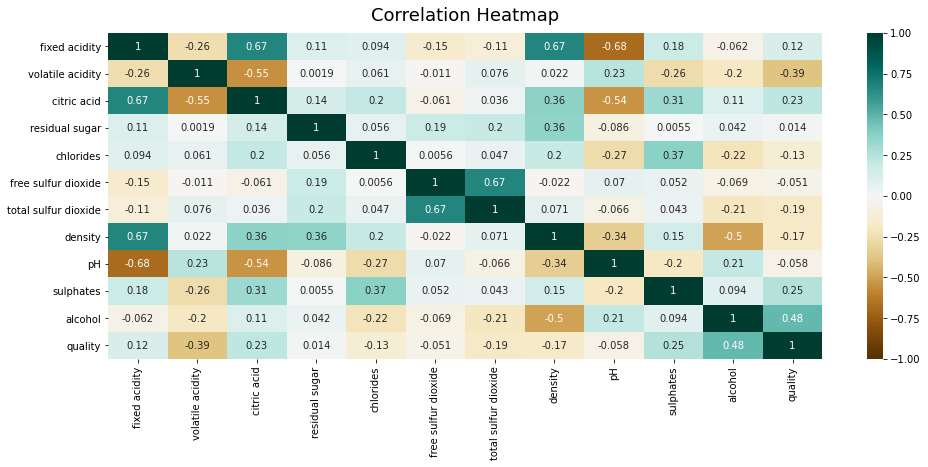

In [6]:
## identifying how strong the columns are corellated

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(wine_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [7]:
## dataframe after shape

wine_df.shape

(1599, 12)

In [8]:
# dataframe column wise statistics

wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# dataframe datatypes

wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
#null values check

wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# unique features in every column 

wine_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [12]:
## Model baeline accuracy without pre processing steps


wine_df['good_quality'] = [1 if x >= 7 else 0 for x in wine_df['quality']]

## dividing train and test samples data 

X = wine_df[['fixed acidity', 'volatile acidity', 'sulphates', 'density','citric acid']]
y = wine_df.good_quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)


classifiers = { 'Logistic Regression': LogisticRegression(),
              'KNN': KNeighborsClassifier()}

In [13]:
## list to store the model accuracy

baseline_models_accuracy = []

In [14]:
## model execution before pre processing

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    baseline_models_accuracy.append((clf_name, accuracy))
    

In [15]:
# sorting of accuracy between two baseline models 

baseline_models_accuracy.sort(key=lambda x: x[1])

In [16]:
## model accuracy before pre processing

results_df_baseline_models = pd.DataFrame(baseline_models_accuracy, columns=["Method Name", "Accuracy"])
results_df_baseline_models

,Method Name,Accuracy
0,KNN,0.831250
1,Logistic Regression,0.853125


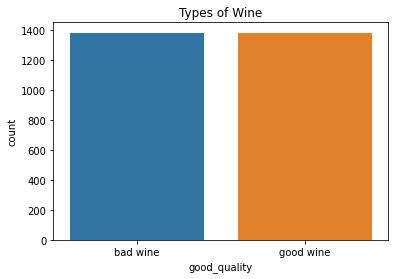

In [17]:
## Pre processing starts from this step

## balacing the skewness in wine quality

from imblearn.over_sampling import SMOTE, ADASYN
#parameter for requires seed
random_value = 2000

X = wine_df[['fixed acidity', 'volatile acidity', 'sulphates', 'alcohol', 'density','citric acid','total sulfur dioxide']]
y = wine_df.good_quality
oversample = SMOTE()
X_ros, y_ros = oversample.fit_resample(X, y)
sns.countplot(x=y_ros)
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()

In [18]:
## drop duplicates

wine_df[wine_df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5,0
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5,0
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,0
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,0
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,0
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5,0


In [19]:
## total drop of duplicates in the wine dataframe

wine_df.drop_duplicates(inplace=True)
wine_df.reset_index(drop=True, inplace=True)
wine_df.shape

(1359, 13)

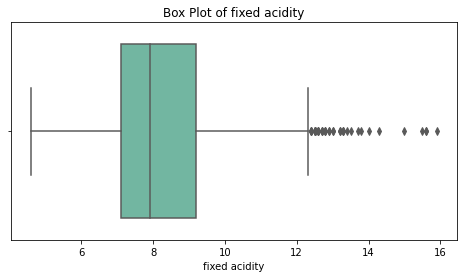

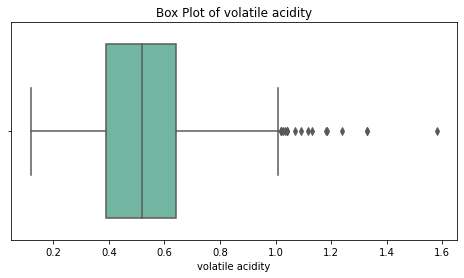

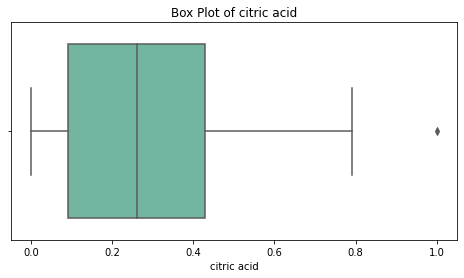

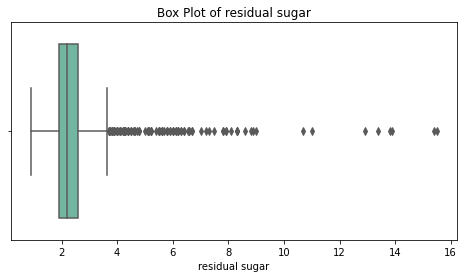

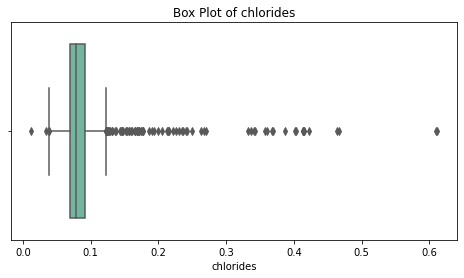

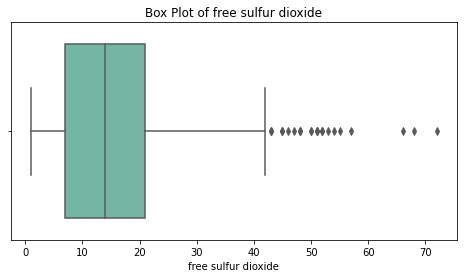

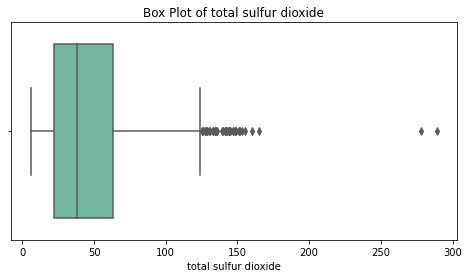

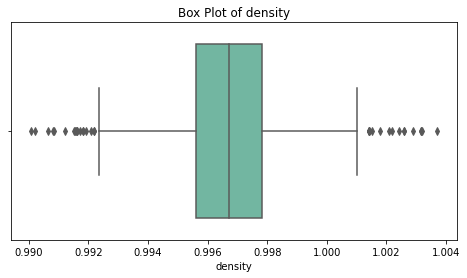

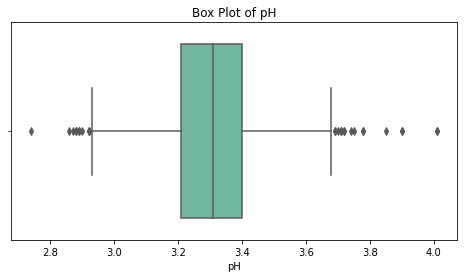

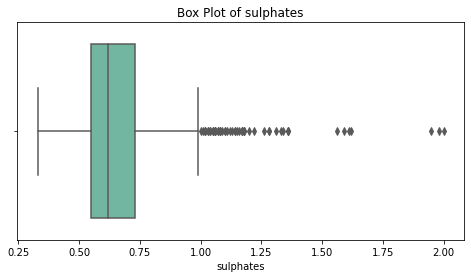

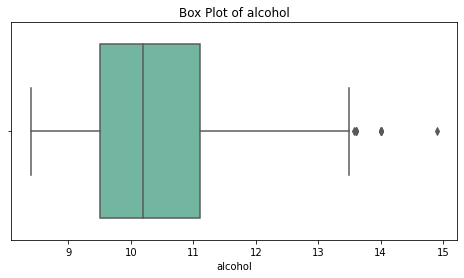

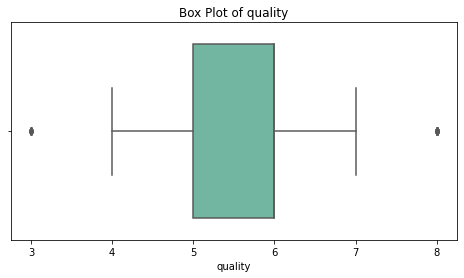

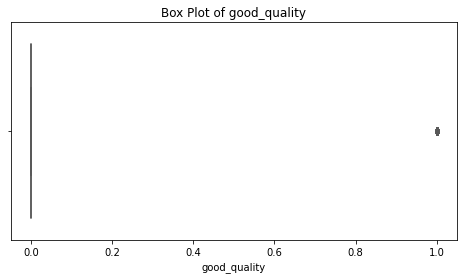

In [20]:
##updated plots after data cleaning

columns_to_plot = wine_df.columns
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    plt.title(f'Box Plot of {col}')
    sns.boxplot(data=wine_df, x=col, palette="Set2")
    plt.show()

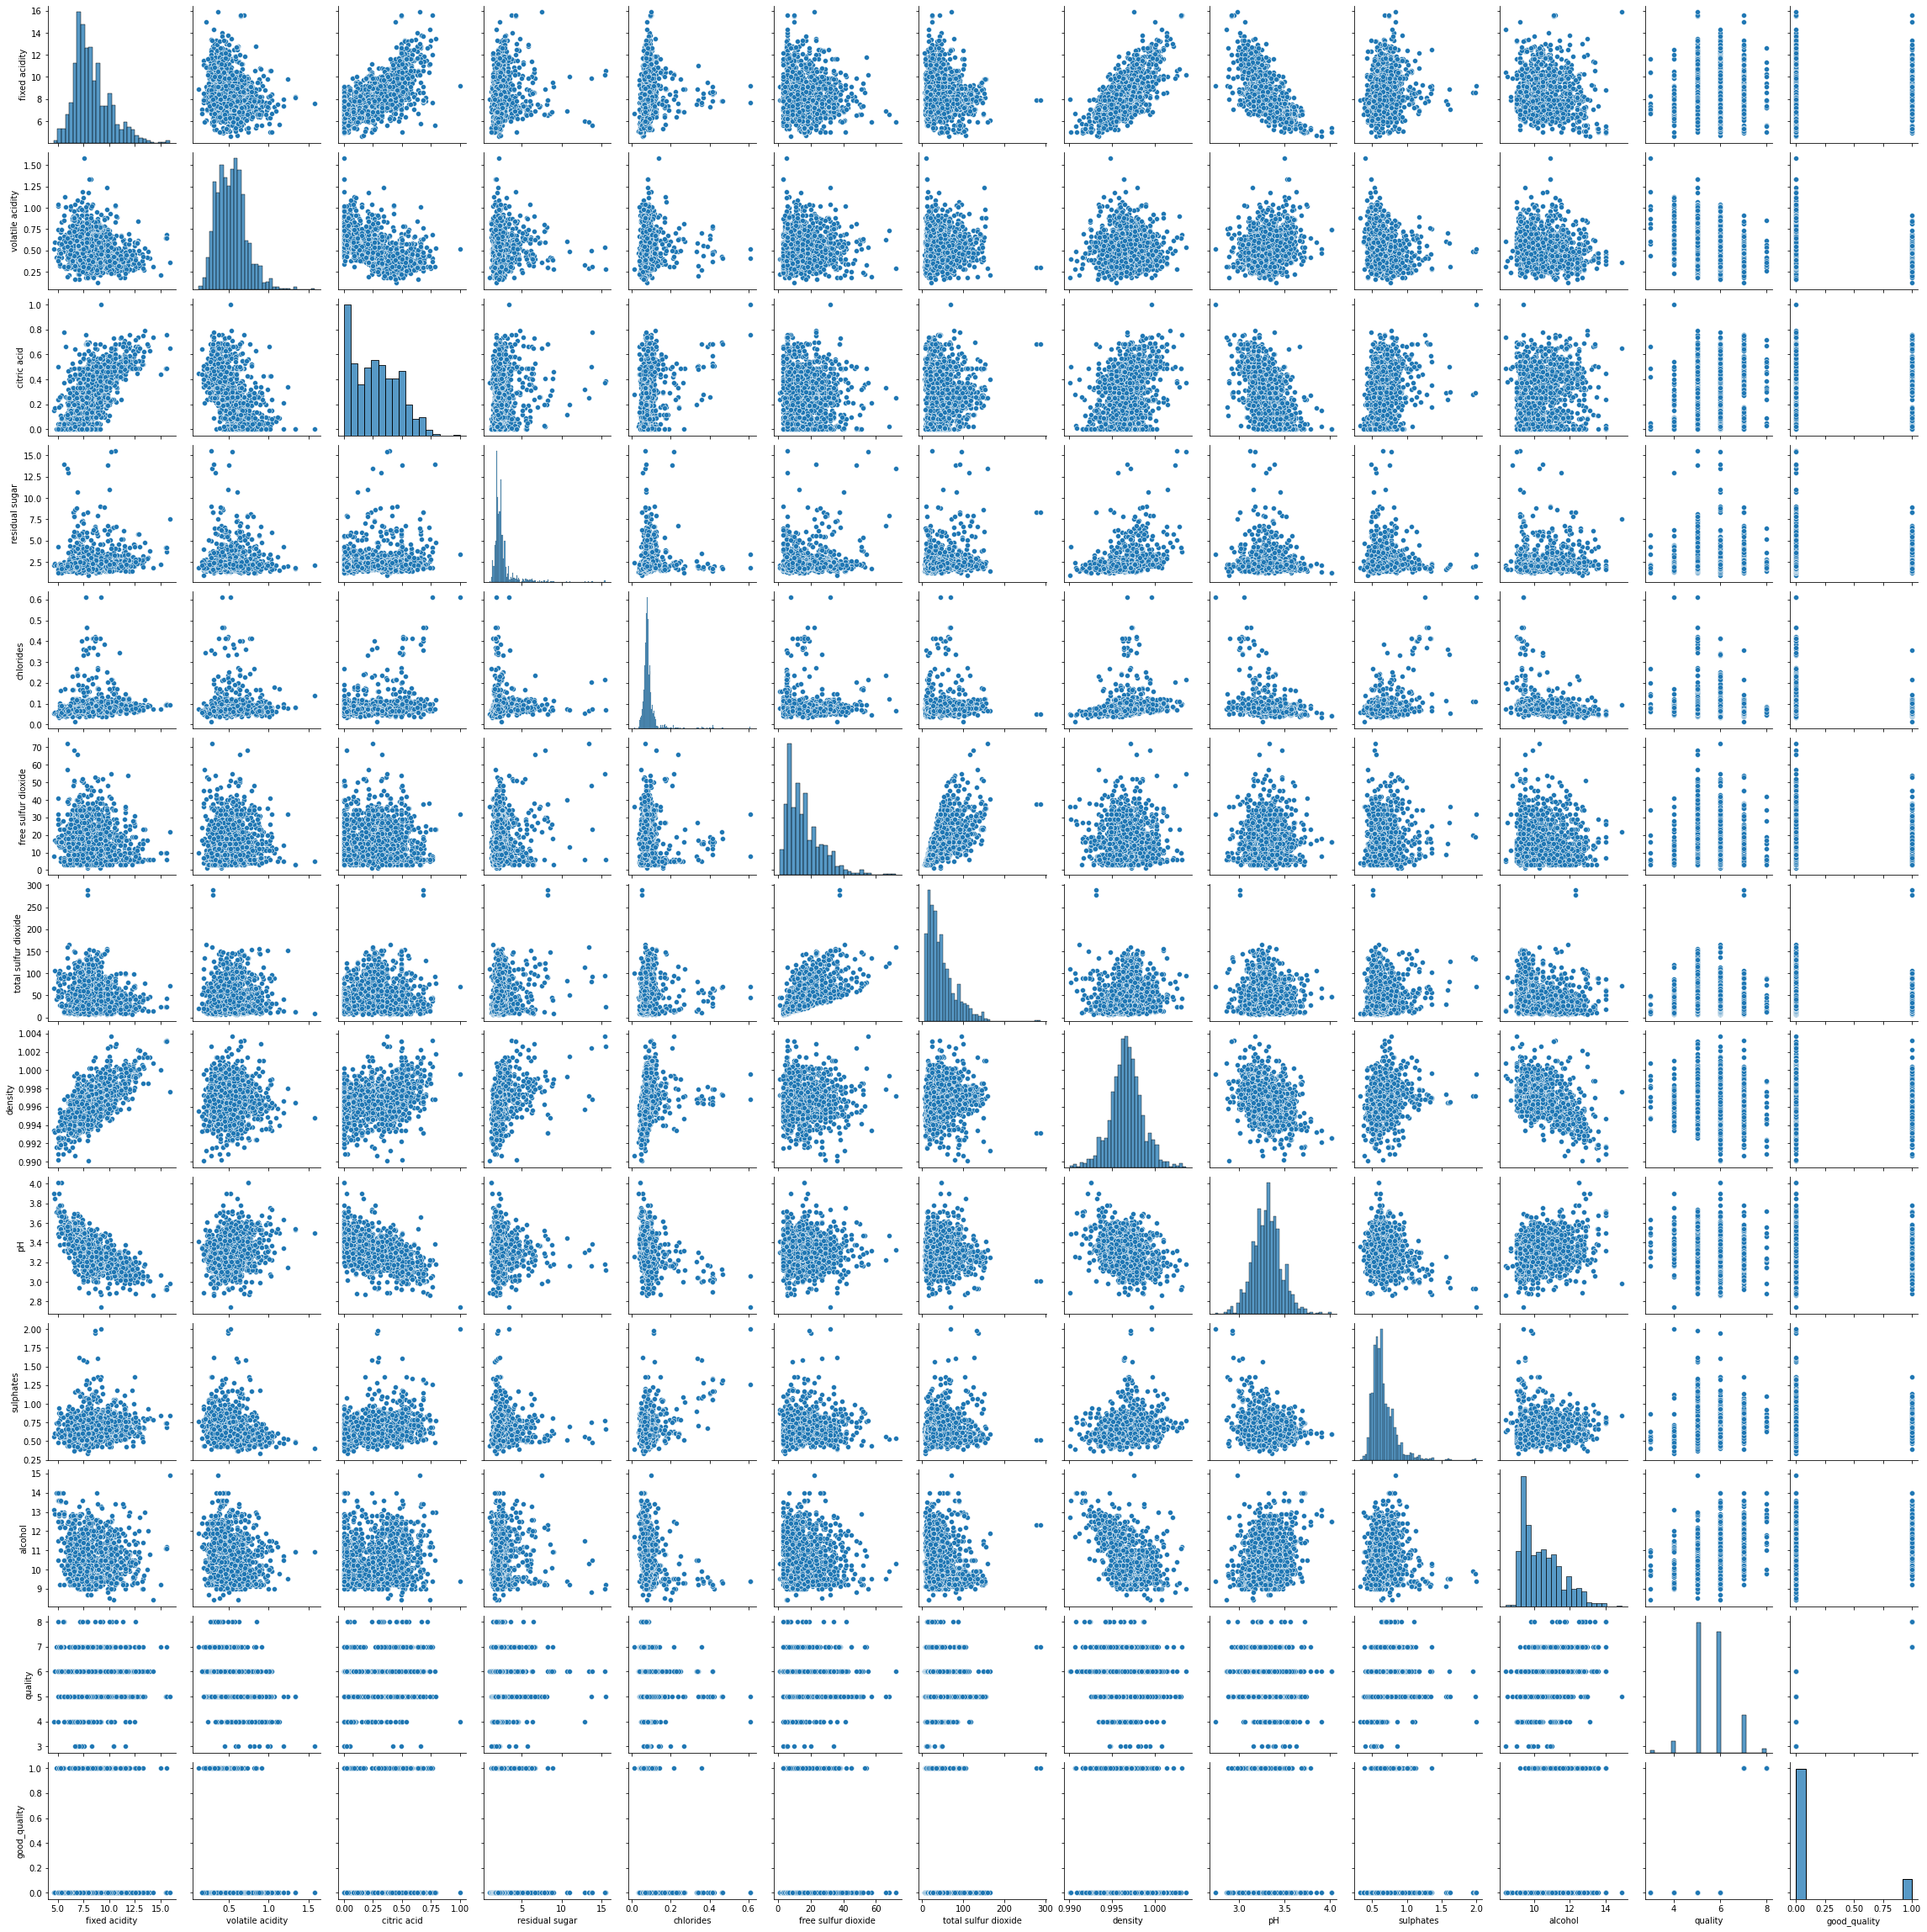

In [21]:
sns.pairplot(wine_df)

In [25]:
## wine quality all unique values

wine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<Axes: xlabel='quality', ylabel='count'>

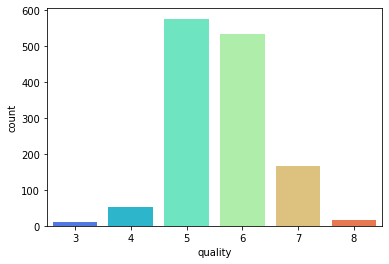

In [26]:
## quality distribution

sns.countplot(x=wine_df['quality'],palette='rainbow')

In [27]:
#setting the wine quality between 1 and 0, if wine quality is >=7 is good which means 1

wine_df['good_quality'] = [1 if x >= 7 else 0 for x in wine_df['quality']]
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
5,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
6,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
7,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
8,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,0


In [28]:
## different wine quality 

wine_df['good_quality'].value_counts()

good_quality
0    1175
1     184
Name: count, dtype: int64

In [29]:
## Installing the SMOTE package 

!pip install SMOTE

## Feature selection
Insights From above visulaization figures we selected suitable columns for the model
:

Alcohol is positively correlated with the quality of the red wine.
Alcohol has a weak positive correlation with the pH value.
Citric acid and density have a strong positive correlation with fixed acidity.
pH has a negative correlation with density, fixed acidity, citric acid, and sulfates.

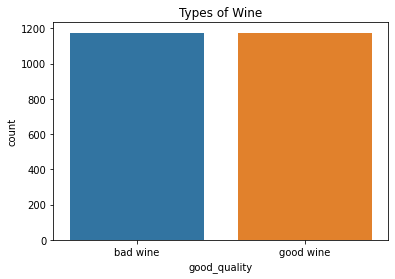

In [30]:
## balacing the skewness in wine quality

from imblearn.over_sampling import SMOTE, ADASYN
#parameter for requires seed
random_value = 2000

X = wine_df[['fixed acidity', 'volatile acidity', 'sulphates', 'alcohol', 'density','citric acid','total sulfur dioxide']]
y = wine_df.good_quality
oversample = SMOTE()
X_ros, y_ros = oversample.fit_resample(X, y)
sns.countplot(x=y_ros)
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()

In [31]:
## dividing train and test samples data 

# split dataset to train and test variable 
# use test size of 20% of the data proportion

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=random_value)

In [32]:
X_train.shape

(1880, 7)

In [33]:
y_train.shape

(1880,)

In [34]:
y_test.shape

(470,)

In [35]:
X_test.shape

(470, 7)

In [36]:
## Intializing model classifiers after pre processing the data

classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier()
}

In [37]:
## standaridising the data 

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [38]:
X_train_standardized

array([[-0.02996562, -0.0932258 ,  4.1365108 , ...,  0.31012608,
         1.42485198,  0.11182695],
       [ 2.25626384, -1.11363275,  2.7237778 , ...,  1.62865028,
         1.58685251, -0.40054036],
       [ 0.13644497,  0.44102815, -0.63623665, ..., -0.11246886,
        -1.44652634,  0.45538001],
       ...,
       [-1.83172726,  0.02331485,  1.15413645, ..., -2.29776453,
        -0.9930751 ,  1.5762907 ],
       [-0.41825698, -0.92428751,  0.52470192, ...,  0.46473399,
         0.6417488 , -0.76267175],
       [ 0.69114692, -0.80556441, -0.95871958, ..., -0.8855084 ,
         0.38071441, -1.07499272]])

In [39]:
X_test_standardized

array([[ 2.12657757, -1.01514198,  3.20851331, ...,  1.67972036,
         1.30446137, -0.38087507],
       [-1.14299271, -0.14870997, -0.67309026, ..., -1.28050559,
        -0.46695596, -0.40649842],
       [ 0.39643695, -0.95969552, -0.54761096, ..., -0.21077548,
         0.54052862, -0.98129643],
       ...,
       [-1.06218593, -0.62324648,  0.53594543, ..., -0.77676834,
         0.30285927, -0.21905509],
       [-0.35768744, -1.57659831,  0.65962423, ..., -0.99472829,
         0.21988038, -0.8222648 ],
       [-0.140906  , -0.330672  ,  0.00872922, ...,  0.76364261,
         0.32850753,  0.58030839]])

In [40]:
results_standardized = []

In [41]:

## Looping the model classifiers which are intialized after pre processing

for clf_name, clf in classifiers.items():
    clf.fit(X_train_standardized, y_train)
    y_pred = clf.predict(X_test_standardized)
    accuracy = accuracy_score(y_test, y_pred)
    results_standardized.append((clf_name, accuracy))
    

In [42]:
## Intializing list to store the model accuracy output 

results_standardized.sort(key=lambda x: x[1])

In [43]:
##results after standardizing the data

results_df_standardized = pd.DataFrame(results_standardized, columns=["Method Name", "Accuracy"])
results_df_standardized

,Method Name,Accuracy
0,Logistic Regression,0.819149
1,SVM,0.872340
2,KNN,0.872340
3,Random Forest,0.925532


In [44]:
## SVC model building for above data

from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train_standardized, y_train)

SVC(random_state=42)

In [45]:
## baseline accuracy

from sklearn import metrics
from sklearn.metrics import accuracy_score
y_pred = svc.predict(X_test_standardized)
print(metrics.accuracy_score(y_test, y_pred))

0.8723404255319149


In [46]:
## Gridsearch to identfy best parameters

from sklearn.model_selection import GridSearchCV
param_dist = {'C': [0.8,0.9,1.0,1.2,1.3,1.4],
              'kernel':['linear', 'rbf','poly']}
svc_cv = GridSearchCV(svc, param_dist, cv=10)
svc_cv.fit(X_train_standardized,y_train)
print(svc_cv.best_params_)

{'C': 1.4, 'kernel': 'rbf'}


In [47]:
## runing the model with implementing latest parameters

svc_new = SVC(C = 1.4, kernel = "rbf", random_state = 42,probability=True)
svc_new.fit(X_train_standardized, y_train)
y_pred_best = svc_new.predict(X_test_standardized)
print(metrics.accuracy_score(y_test, y_pred_best))

## there is no significant increase in the accuracy for SVM

0.8765957446808511


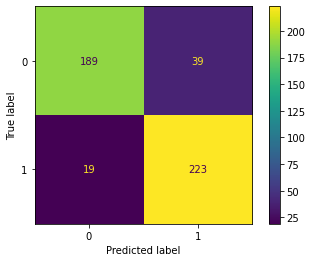

In [48]:
## confusion matrix for updated tree parameters

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_best)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [49]:
## classification report for SVM Model 
    
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_best)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       228
           1       0.85      0.92      0.88       242

    accuracy                           0.88       470
   macro avg       0.88      0.88      0.88       470
weighted avg       0.88      0.88      0.88       470



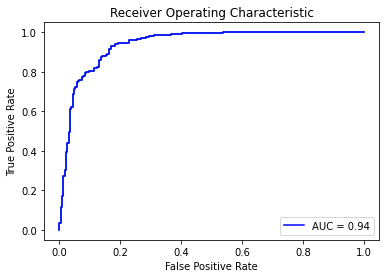

In [50]:
## roc curve for SVM Model

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_pred_best = svc_new.predict_proba(X_test_standardized)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_best)

roc_auc = metrics.auc(fpr, tpr)

#create ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
## random forest

# Random Forest classifier initialization
rfc = RandomForestClassifier(n_estimators=150, random_state=random_value)
                             

In [52]:
# Cross Validation

from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

rf_score = cross_val_score(estimator = rfc,
                               X = X_train_standardized, y= y_train,
                               scoring = 'recall',cv = 10,
                               verbose = 3, n_jobs=-1)
# Fit data training
rfc.fit(X_train_standardized, y_train)
# Predict data test
y_pred = rfc.predict(X_test_standardized)
print('Avarage Recall score', np.mean(rf_score))
print('Test Recall score', recall_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.7s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished


Avarage Recall score 0.9432280942576069
Test Recall score 0.9545454545454546


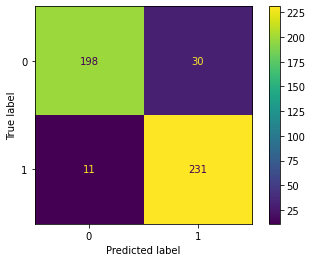

0.9127659574468086


In [53]:
## confusion matrix 

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

print(metrics.accuracy_score(y_test, y_pred))

In [54]:
# Grid parameters intialization for randforest model

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
                'n_estimators': [50, 100, 200],
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 5, 10]
                }
                
# Use RandomizedSearchCV
rf_cv = RandomizedSearchCV(estimator=rfc, param_distributions=rf_grid,
                            scoring='recall', cv=10)

In [55]:
# Fit to model

rf_cv.fit(X_train, y_train)

# Best Score
print(f'Best score: {rf_cv.best_score_}')
print(f'Best params: {rf_cv.best_params_}')


Best score: 0.9250171585449551
Best params: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 10}


In [56]:
# Cross Validation

# Random Forest Regression initialization
rf_tuned = RandomForestClassifier(**rf_cv.best_params_, random_state=random_value)

rf_tuned_score = cross_val_score(estimator = rf_tuned,
                               X = X_train_standardized, y= y_train,
                               scoring = 'recall', cv = 10,
                               verbose = 0)
# Fit data training
rf_tuned.fit(X_train_standardized, y_train)
# Predict data test
y_pred_tuned = rf_tuned.predict(X_test_standardized)
print('Avarage Recall score', np.mean(rf_score))
print('Test Recall score', recall_score(y_test, y_pred))
print('Avarage Recall score Tuning', np.mean(rf_tuned_score))
print('Test Recall score Tuning', recall_score(y_test, y_pred_tuned))

Avarage Recall score 0.9432280942576069
Test Recall score 0.9545454545454546
Avarage Recall score Tuning 0.9250171585449551
Test Recall score Tuning 0.9132231404958677


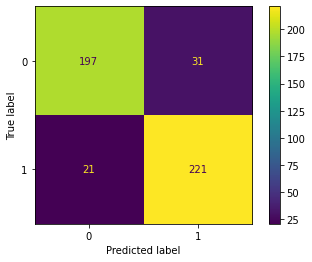

0.8893617021276595


In [57]:
## confusion matrix 

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_tuned)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

print(metrics.accuracy_score(y_test, y_pred_tuned))

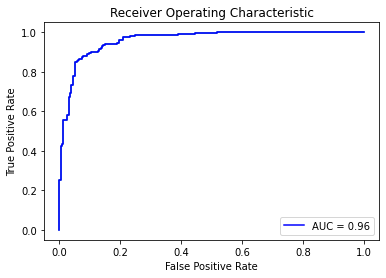

In [58]:
## roc curve for Random Forest

y_pred_tuned = rf_tuned.predict_proba(X_test_standardized)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_tuned)

fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred_tuned)
roc_auc = metrics.auc(fpr, tpr)

#create ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [59]:
## Visulaization of Random forests importance across the features

importances = rf_tuned.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_tuned.estimators_], axis=0)

In [60]:
feature_names_from_dataset = wine_df.columns.drop(['quality','good_quality','residual sugar','chlorides', 'free sulfur dioxide', 'pH']).tolist()
feature_names_from_dataset

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

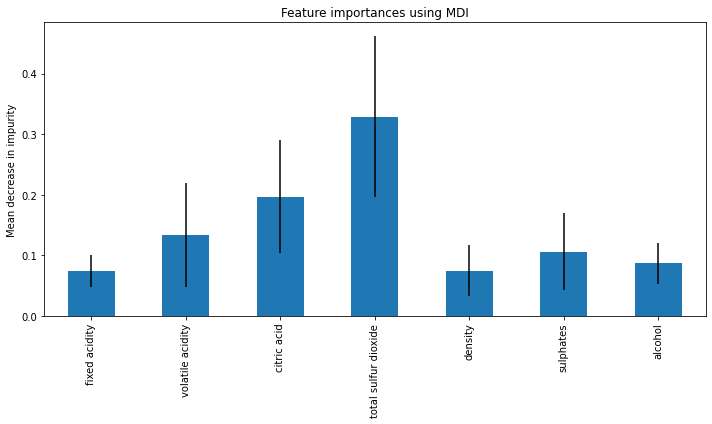

In [61]:
## Visulaization of random forest importance towards the features


forest_importances = pd.Series(importances, index = feature_names_from_dataset)
# Set the size of the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
forest_importances.plot.bar(yerr=std, ax=ax)

# Set titles and labels
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

# Adjust layout for better appearance
fig.tight_layout()

# Display the plot
plt.show()